# Data Visualization
To understand the data better, we will visualize the data using different plots.
It will help us to understand the data distribution, correlation between features, and many more.

## Importing Libraries

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Understanding the data
Let's first load the data and understand the data better.

In [63]:
MARKETS = ['bengaluru', 'doddaballapur', 'hubballi', 'mysuru']
bengaluru_df = pd.read_csv('krama_report_bengaluru.csv')
doddaballapur_df = pd.read_csv('krama_report_doddaballapur.csv')
hubballi_df = pd.read_csv('krama_report_hubballi.csv')
mysuru_df = pd.read_csv('krama_report_mysuru.csv')
all_df = [bengaluru_df, doddaballapur_df, hubballi_df, mysuru_df]

bengaluru_df.head()

,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District
0,BENGALURU,07/02/2002,ONION,FAQ,14350,Quintal,260,360,310,Bengaluru Urban�
1,BENGALURU,07/02/2002,OTHER,FAQ,0,Quintal,150,240,195,Bengaluru Urban�
2,BENGALURU,27/03/2002,ONION,FAQ,10818,Quintal,170,280,225,Bengaluru Urban�
3,BENGALURU,28/03/2002,ONION,FAQ,8048,Quintal,190,300,245,Bengaluru Urban�
4,BENGALURU,30/03/2002,ONION,FAQ,16590,Quintal,180,280,230,Bengaluru Urban�


In [64]:
bengaluru_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16993 entries, 0 to 16992
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Market    16993 non-null  object
 1   Date      16993 non-null  object
 2   Variety   16993 non-null  object
 3   Grade     16993 non-null  object
 4   Arrivals  16993 non-null  int64 
 5   Unit      16993 non-null  object
 6   Min       16993 non-null  int64 
 7   Max       16993 non-null  int64 
 8   Modal     16993 non-null  int64 
 9   District  16993 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.3+ MB


## Date Time Conversion

In [65]:
# Convert the date column to datetime
for df in all_df:
    df['Date'] = pd.to_datetime(df['Date'], format=r'%d/%m/%Y')
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
bengaluru_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16993 entries, 0 to 16992
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Market    16993 non-null  object        
 1   Date      16993 non-null  datetime64[ns]
 2   Variety   16993 non-null  object        
 3   Grade     16993 non-null  object        
 4   Arrivals  16993 non-null  int64         
 5   Unit      16993 non-null  object        
 6   Min       16993 non-null  int64         
 7   Max       16993 non-null  int64         
 8   Modal     16993 non-null  int64         
 9   District  16993 non-null  object        
 10  Day       16993 non-null  int32         
 11  Month     16993 non-null  int32         
 12  Year      16993 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(4), object(5)
memory usage: 1.5+ MB


## Unique Values
Let check the number of unique values in each column.

Market         1
Date        6057
Variety        6
Grade          5
Arrivals    9739
Unit           1
Min          189
Max          275
Modal        337
District       1
Day           31
Month         12
Year          23
dtype: int64

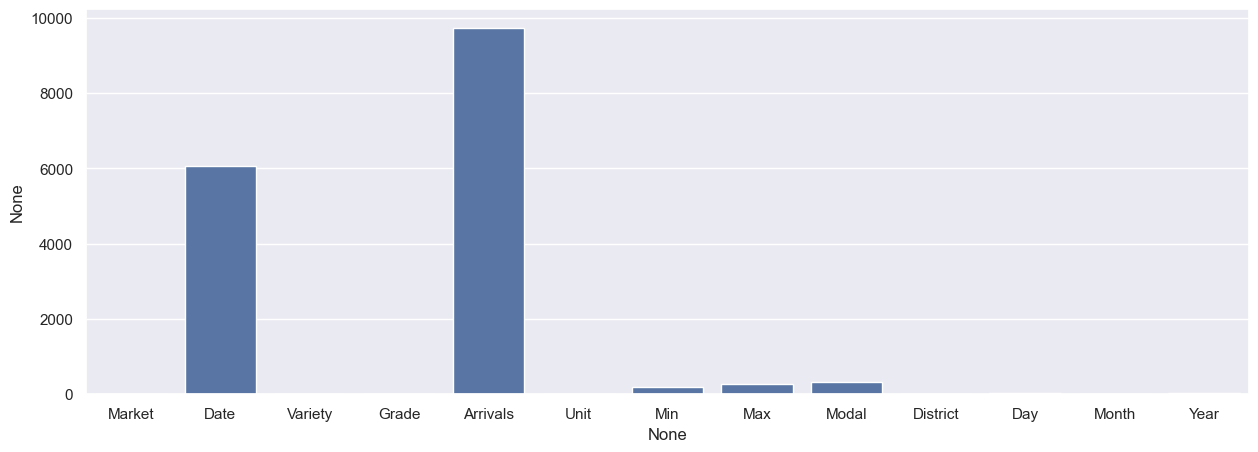

In [66]:
# plot unique values in the columns
sns.set(rc={'figure.figsize':(15, 5)})
sns.barplot(x=bengaluru_df.columns, y=bengaluru_df.nunique())
bengaluru_df.nunique()

We can see that the Market, Unit and District columns have only 1 Value throughout the dataset. So we can drop these columns for further analysis.

In [67]:
dropped_columns = ['Market', 'Unit', 'District']
for df in all_df:
    df.drop(columns=dropped_columns, inplace=True)
bengaluru_df.head()

,Date,Variety,Grade,Arrivals,Min,Max,Modal,Day,Month,Year
0,2002-02-07,ONION,FAQ,14350,260,360,310,7,2,2002
1,2002-02-07,OTHER,FAQ,0,150,240,195,7,2,2002
2,2002-03-27,ONION,FAQ,10818,170,280,225,27,3,2002
3,2002-03-28,ONION,FAQ,8048,190,300,245,28,3,2002
4,2002-03-30,ONION,FAQ,16590,180,280,230,30,3,2002


## Distribution by Variety and Grade

The distribution of grades by variety and vareity by grades in Bengaluru


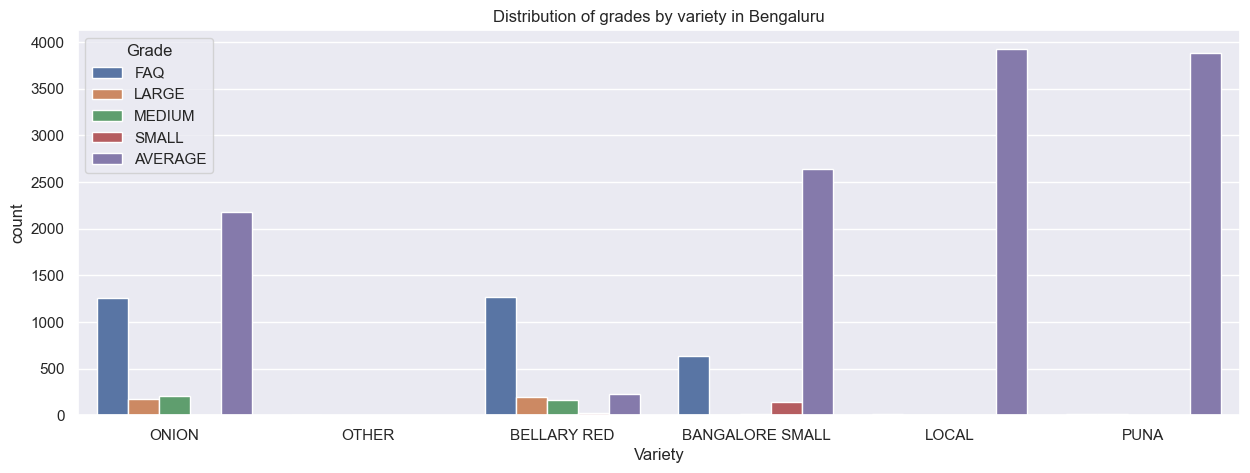

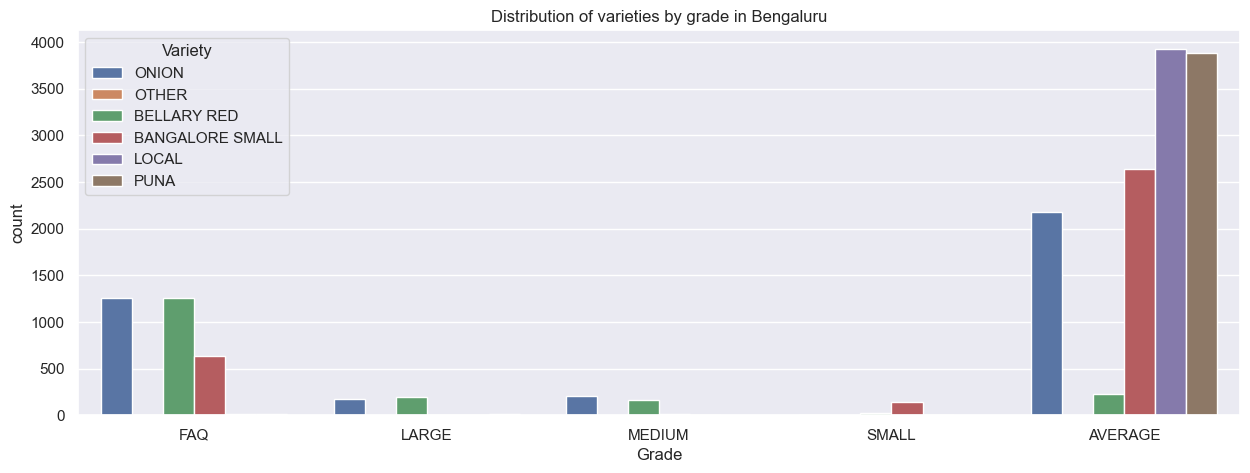

In [68]:
# PLotting the distribution by variety and grade
def plot_distribution(df, market):
    print('The distribution of grades by variety and vareity by grades in', market)
    sns.set_theme(rc={'figure.figsize':(15, 5)})
    sns.countplot(x='Variety', data=df, hue='Grade')
    plt.title(f'Distribution of grades by variety in {market}')
    plt.show()
    sns.set_theme(rc={'figure.figsize':(15, 5)})
    sns.countplot(x='Grade', data=df, hue='Variety')
    plt.title(f'Distribution of varieties by grade in {market}')
    plt.show()
    
plot_distribution(bengaluru_df, 'Bengaluru')

Through the graphs we can observe that the varieties bellary red and onion come in a range of grades and majority of the commodities are of grade Average.

The distribution of grades by variety and vareity by grades in Doddaballapur


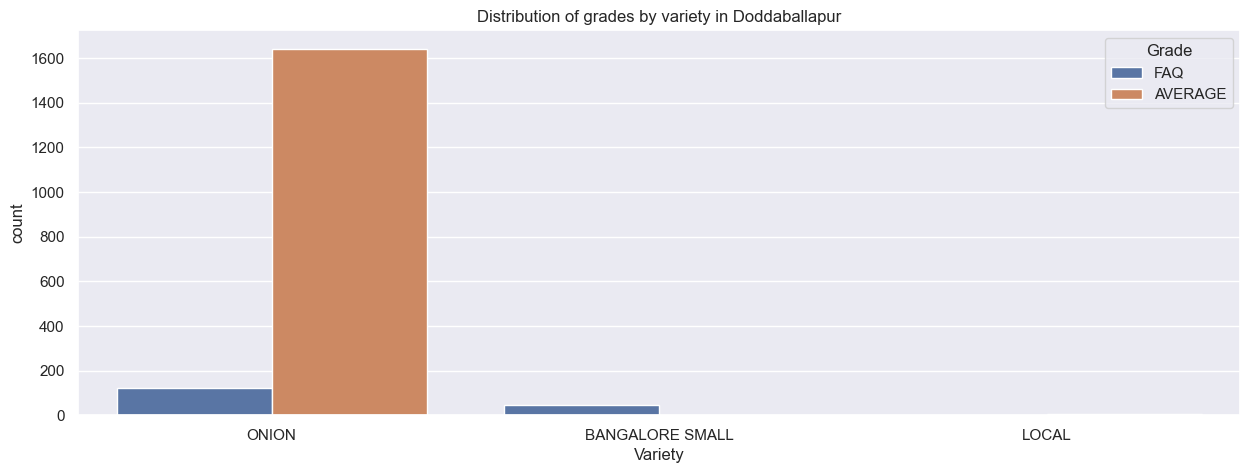

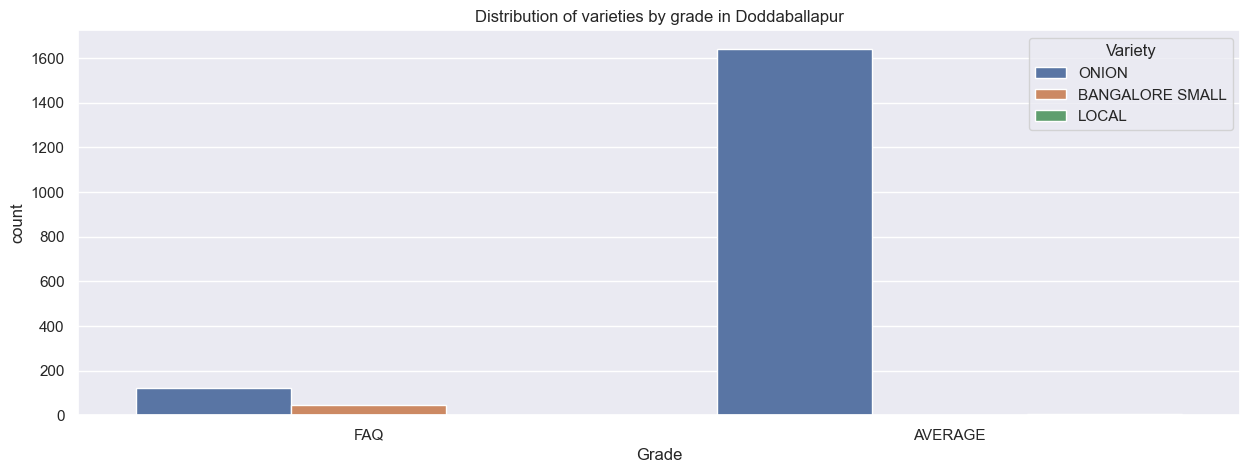

The distribution of grades by variety and vareity by grades in Hubballi


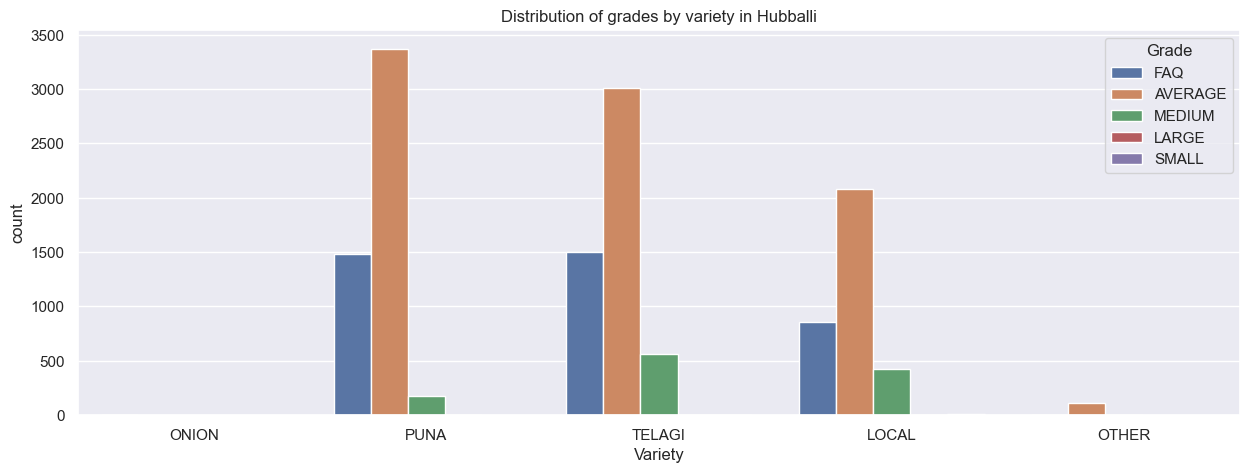

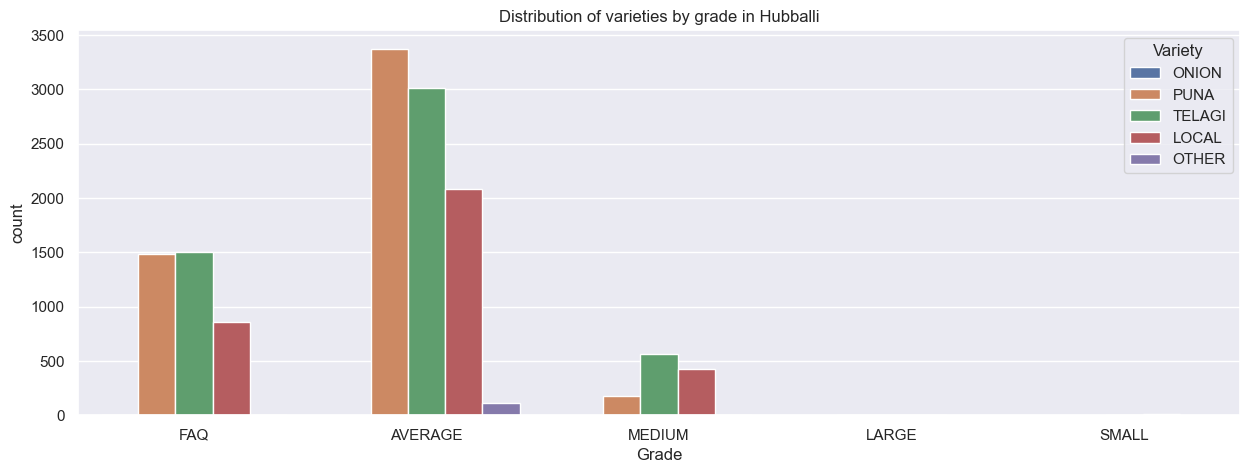

The distribution of grades by variety and vareity by grades in Mysuru


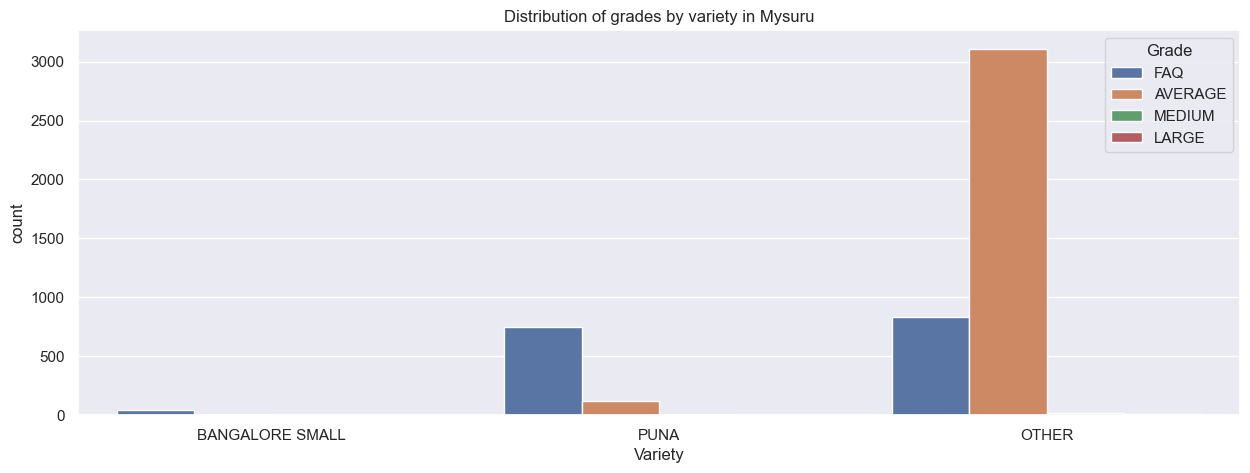

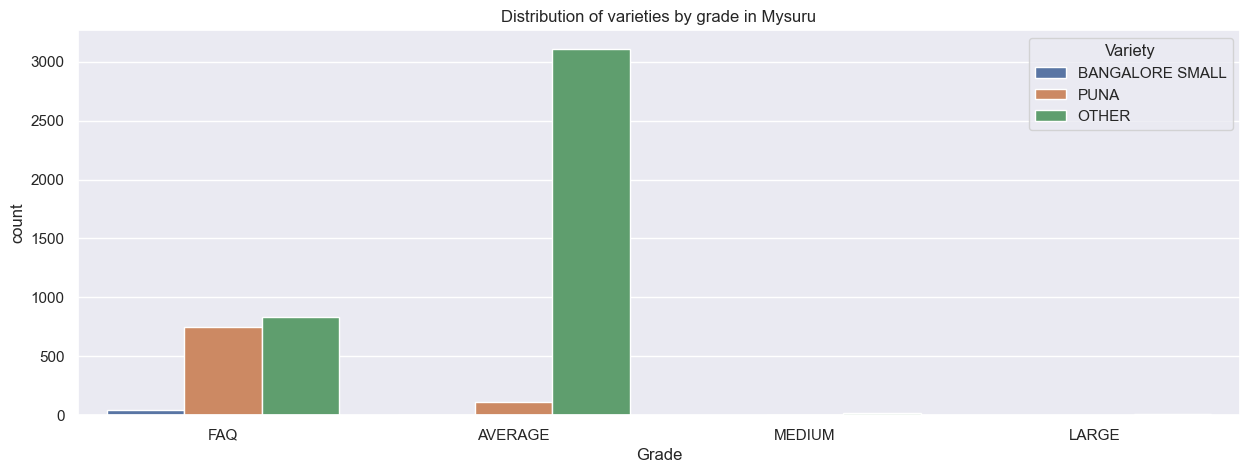

In [69]:
# Similarly the distribution of grades and varieties in the other markets
plot_distribution(doddaballapur_df, 'Doddaballapur')
plot_distribution(hubballi_df, 'Hubballi')
plot_distribution(mysuru_df, 'Mysuru')

We can notice that in general the commodities are of grade Average.

## Distribution of prices



### By the month

In [70]:
# Distribution of prices by the month of the year
def plot_price_distribution(df, market):
    print('The distribution of prices by the month of the year in', market)
    sns.set_theme(rc={'figure.figsize':(15, 5)})
    sns.lineplot(x='Month', y='Modal', data=df, label='Modal Price')
    plt.title(f'Distribution of prices by the month of the year in {market}')
    plt.show()

The distribution of prices by the month of the year in Bengaluru


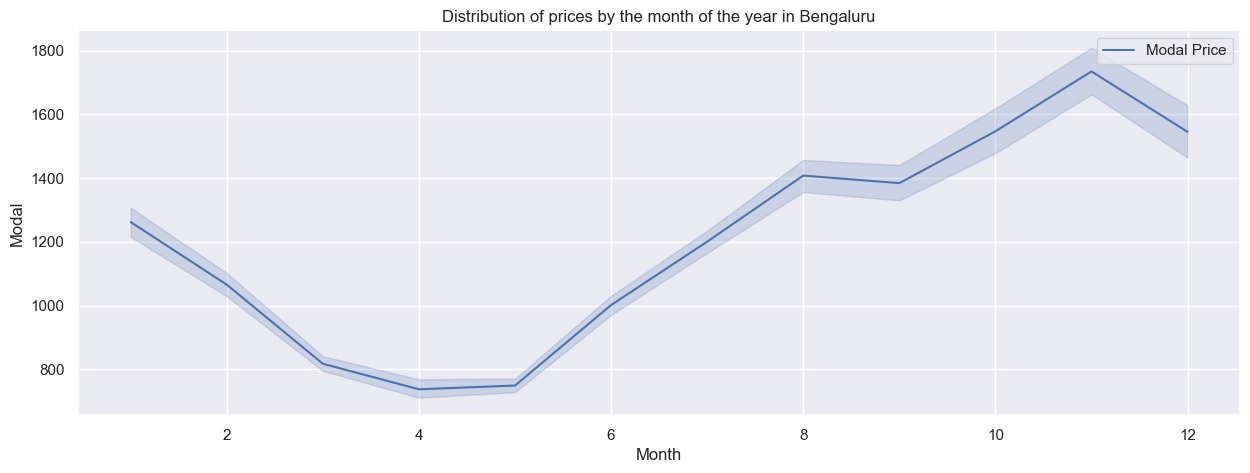

In [71]:
plot_price_distribution(bengaluru_df, 'Bengaluru')
# plot_price_distribution(doddaballapur_df, 'Doddaballapur')
# plot_price_distribution(hubballi_df, 'Hubballi')
# plot_price_distribution(mysuru_df, 'Mysuru')

We can observe that the prices are generally highest in the months of November and December and lowest in the months of April and May.
We can also observe that the prices are high during the February month of recent years in the Hubbali market.

### By the year

The distribution of prices by the year in Bengaluru


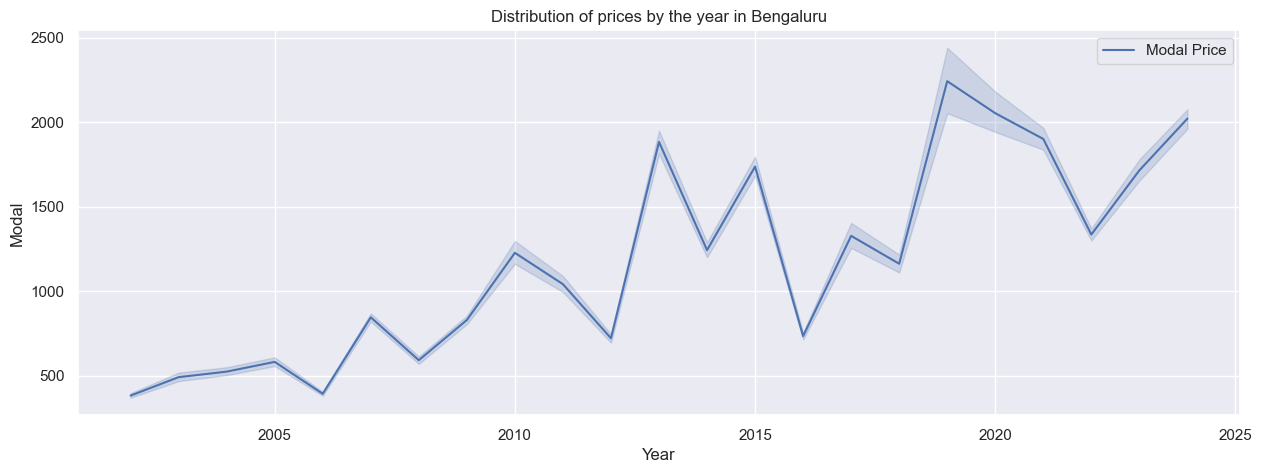

In [72]:
def plot_price_distribution_by_year(df, market):
    print('The distribution of prices by the year in', market)
    sns.set_theme(rc={'figure.figsize':(15, 5)})
    sns.lineplot(x='Year', y='Modal', data=df, label='Modal Price')
    plt.title(f'Distribution of prices by the year in {market}')
    plt.show()

plot_price_distribution_by_year(bengaluru_df, 'Bengaluru')
# plot_price_distribution_by_year(doddaballapur_df, 'Doddaballapur')
# plot_price_distribution_by_year(hubballi_df, 'Hubballi')
# plot_price_distribution_by_year(mysuru_df, 'Mysuru')

Although the prices are varying by a big margin, we can observe that the prices are generally increasing over the years.

### By the date of the month

The distribution of prices by the day of the month in Bengaluru


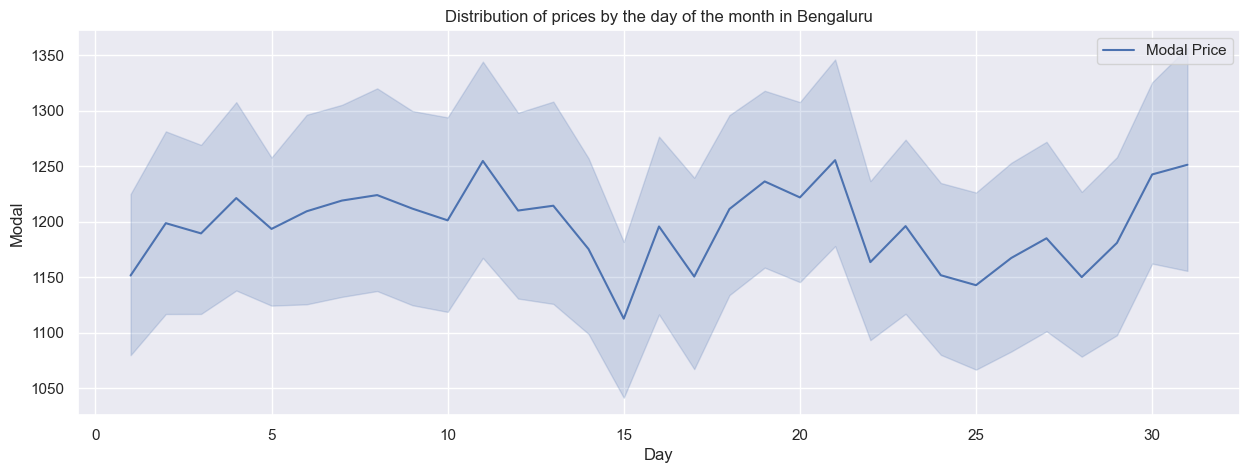

In [73]:
def plot_price_distribution_by_day(df, market):
    print('The distribution of prices by the day of the month in', market)
    sns.set_theme(rc={'figure.figsize':(15, 5)})
    sns.lineplot(x='Day', y='Modal', data=df, label='Modal Price')
    plt.title(f'Distribution of prices by the day of the month in {market}')
    plt.show()
    
plot_price_distribution_by_day(bengaluru_df, 'Bengaluru')
# plot_price_distribution_by_day(doddaballapur_df, 'Doddaballapur')
# plot_price_distribution_by_day(hubballi_df, 'Hubballi')
# plot_price_distribution_by_day(mysuru_df, 'Mysuru')

There are no obvious patterns in the prices by the date of the month.
In the Hubbali market, the prices seem to spike up on 27th of the month.
And we can also observe the lower prices on the 15th of the month in the other markets.

### By the day of the week


The distribution of prices by the day of the week in Bengaluru


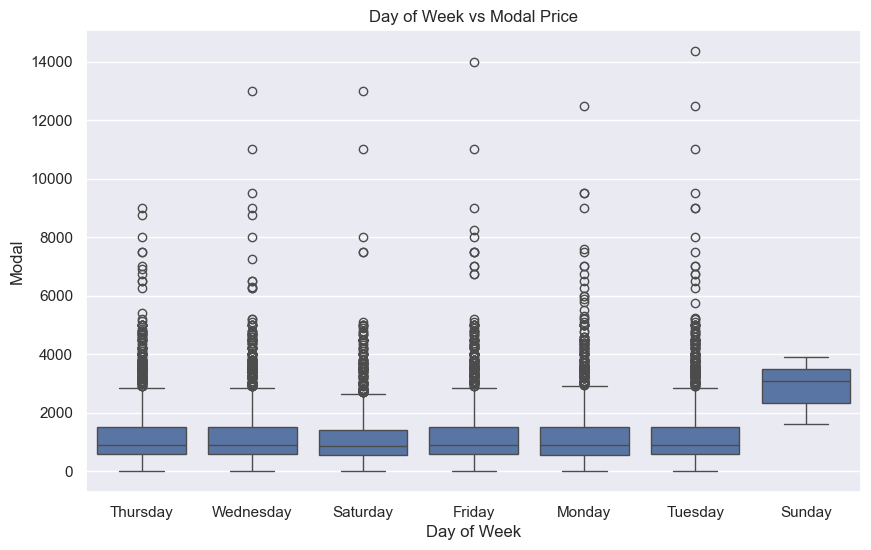

In [74]:
def plot_day_of_week(df, market):
    print('The distribution of prices by the day of the week in', market)
    df['Day of Week'] = df['Date'].dt.dayofweek
    df['Day of Week'] = df['Day of Week'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Day of Week',y='Modal',data=df)
    plt.title('Day of Week vs Modal Price')
    plt.show()

plot_day_of_week(bengaluru_df, 'Bengaluru')
# plot_day_of_week(doddaballapur_df, 'Doddaballapur')
# plot_day_of_week(hubballi_df, 'Hubballi')
# plot_day_of_week(mysuru_df, 'Mysuru')

We can see that the prices are higher on the weekends compared to the weekdays especially on Sunday in the Bangalore market and Mysuru markets.

## Variety and Grade wise prices

### Variety wise prices

The distribution of prices by the variety in Bengaluru


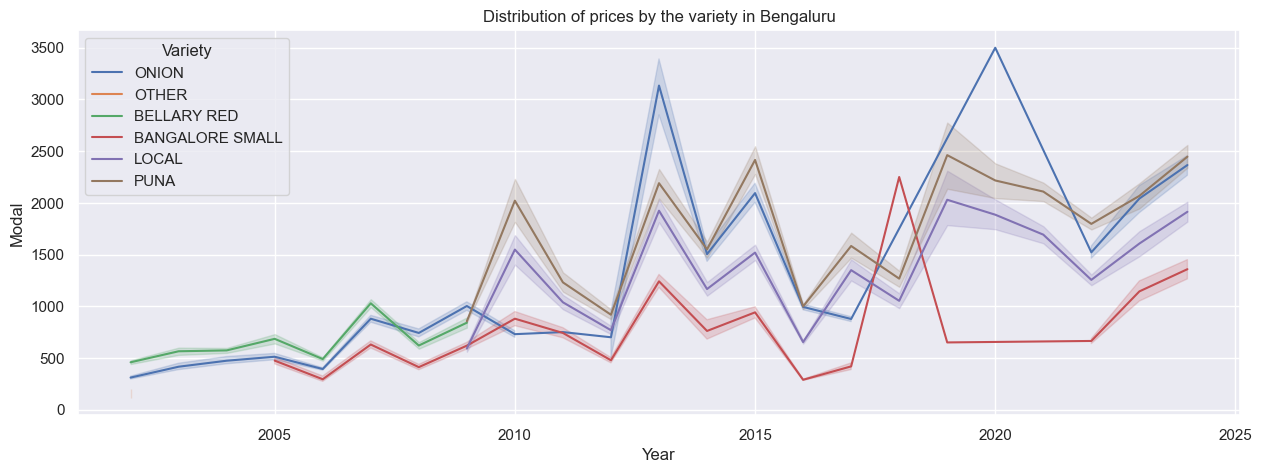

In [75]:
# Distribution of prices by the variety
def plot_price_distribution_by_variety(df, market):
    print('The distribution of prices by the variety in', market)
    sns.set_theme(rc={'figure.figsize':(15, 5)})
    sns.lineplot(x='Year', y='Modal', hue='Variety', data=df)
    plt.title(f'Distribution of prices by the variety in {market}')
    plt.show()

plot_price_distribution_by_variety(bengaluru_df, 'Bengaluru')
# plot_price_distribution_by_variety(doddaballapur_df, 'Doddaballapur')
# plot_price_distribution_by_variety(hubballi_df, 'Hubballi')
# plot_price_distribution_by_variety(mysuru_df, 'Mysuru')


### Grade wise prices

The distribution of prices by the grade in Bengaluru


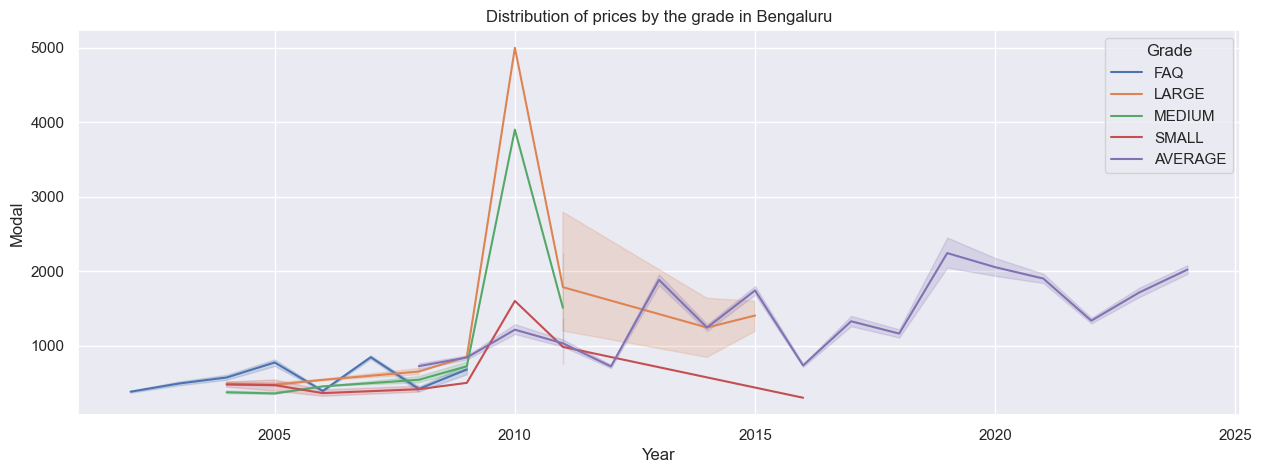

In [76]:
# Distribution of prices by the grade
def plot_price_distribution_by_grade(df, market):
    print('The distribution of prices by the grade in', market)
    sns.set_theme(rc={'figure.figsize':(15, 5)})
    sns.lineplot(x='Year', y='Modal', hue='Grade', data=df)
    plt.title(f'Distribution of prices by the grade in {market}')
    plt.show()

plot_price_distribution_by_grade(bengaluru_df, 'Bengaluru')
# plot_price_distribution_by_grade(doddaballapur_df, 'Doddaballapur')
# plot_price_distribution_by_grade(hubballi_df, 'Hubballi')
# plot_price_distribution_by_grade(mysuru_df, 'Mysuru')

## Additional Data Visualizations

To gain deeper insights into the data, we can explore additional visualizations.

### Heatmap of Correlations
A heatmap can help us understand the correlation between different numerical features in the dataset.

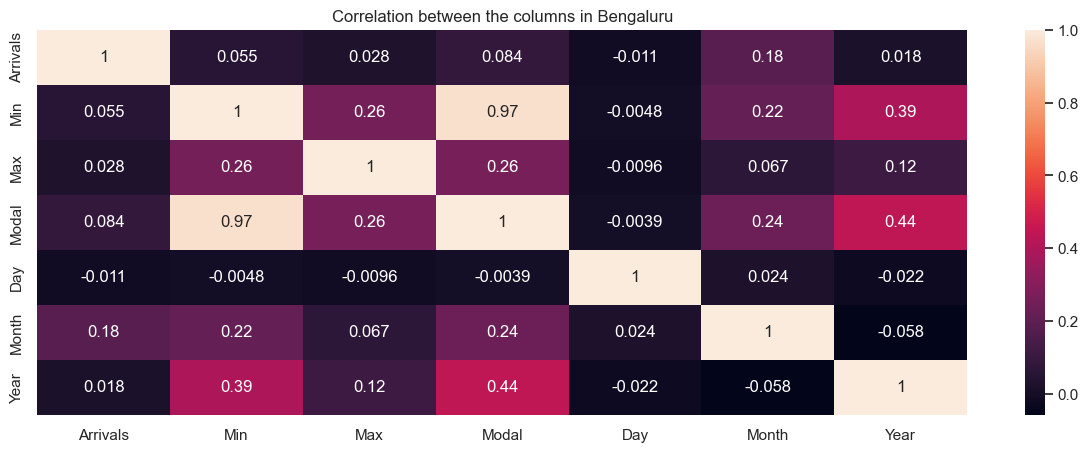

In [77]:
# heatmap of the correlation between the columns
sns.heatmap(bengaluru_df.corr(numeric_only=True), annot=True)
plt.title('Correlation between the columns in Bengaluru')
plt.show()

We can see the correlation between Min and Modal is high which means if the minimum price is high, the modal price is also high and they increase together.
We can also notice that the correlation between Modal and Year is high which means the prices are increasing over the years.

### Histogram of Arrivals
A histogram can show the distribution of arrivals, helping to understand the frequency and spread of arrival quantities.

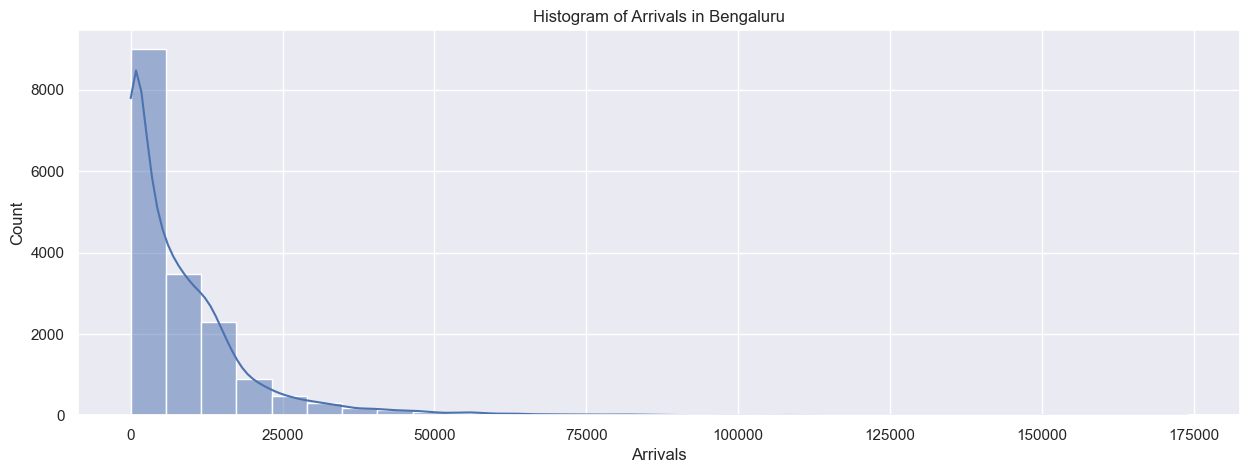

In [78]:
# Histogram of Arrivals
sns.histplot(bengaluru_df['Arrivals'], bins=30, kde=True)
plt.title('Histogram of Arrivals in Bengaluru')
plt.show()

Majority of the arrivals are in the range of 0 to 10,000.

### Scatter Plot of Min vs. Max Prices
A scatter plot can show the relationship between the minimum and maximum prices, helping to identify any potential patterns or anomalies.

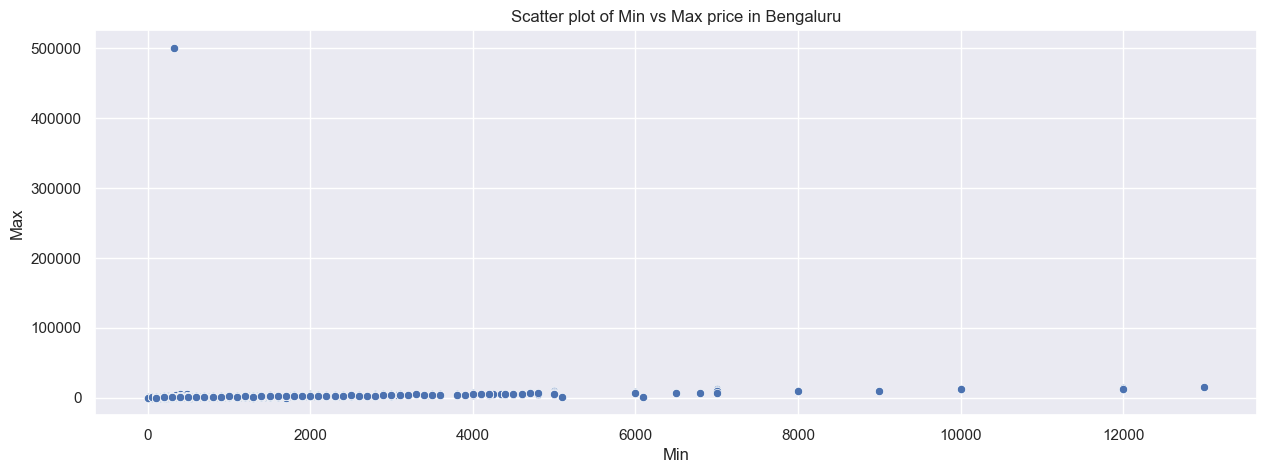

In [79]:
# Scatter plot of Min vs Max price
sns.scatterplot(x='Min', y='Max', data=bengaluru_df)
plt.title('Scatter plot of Min vs Max price in Bengaluru')
plt.show()

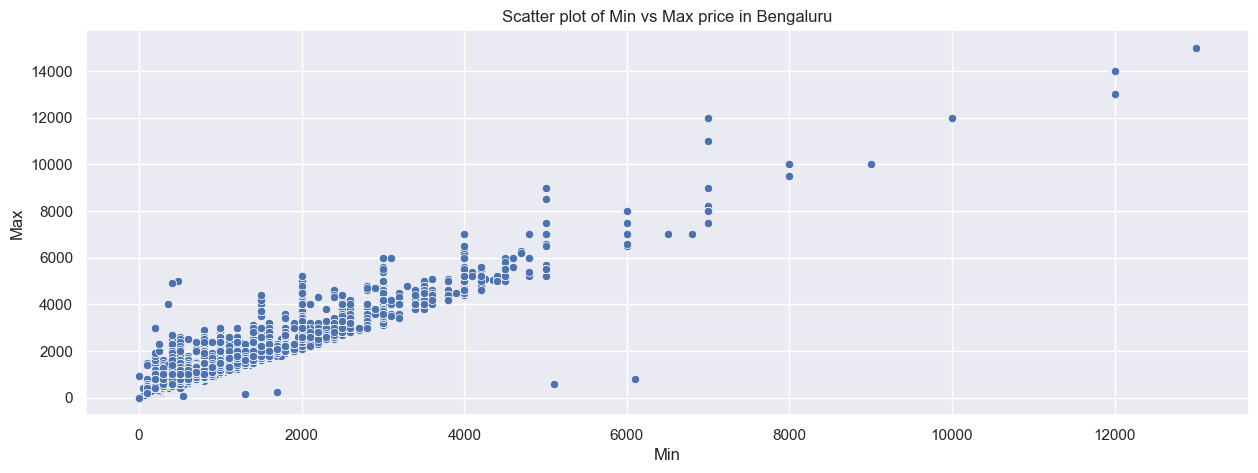

In [80]:
outlier = np.max(bengaluru_df['Max'])
bengaluru_df.drop(bengaluru_df[bengaluru_df['Max'] == outlier].index, inplace=True)
sns.scatterplot(x='Min', y='Max', data=bengaluru_df)
plt.title('Scatter plot of Min vs Max price in Bengaluru')
plt.show()

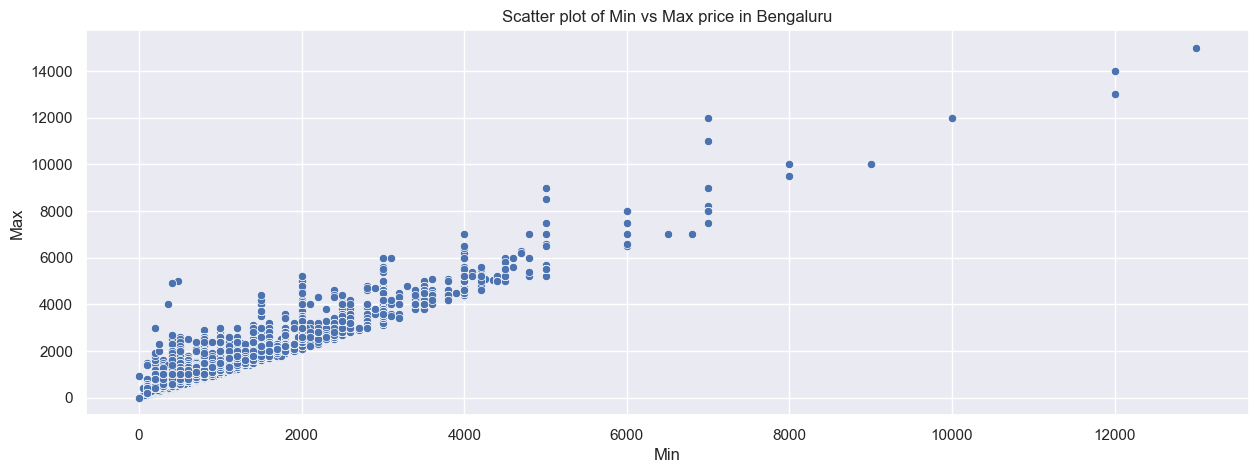

In [81]:
# Dropping all rows with min values more than the max values
bengaluru_df.drop(bengaluru_df[bengaluru_df['Min'] > bengaluru_df['Max']].index, inplace=True)
sns.scatterplot(x='Min', y='Max', data=bengaluru_df)
plt.title('Scatter plot of Min vs Max price in Bengaluru')
plt.show()

In [82]:
bengaluru_df.shape

(16982, 11)

# Conclusion

Through the data visualizations, we were able to gain insights into the data and understand the distribution of prices, arrivals, and other features.
- We can observe that the prices are generally increasing over the years and are highest in the months of November and December.
- We can also observe that the prices are higher on the weekends compared to the weekdays especially on Sunday in the Bangalore market and Mysuru markets.
- The commodities are generally of grade Average and the varieties bellary red and onion come in a range of grades.
- The correlation between Min and Modal is high which means if the minimum price is high, the modal price is also high and they increase together.
- Majority of the arrivals are in the range of 0 to 10,000.

These insights can help us understand the data better and help farmers make informed decisions based on the trends and patterns observed in the data.